In [ ]:
# LINEAR & LOGISTIC REGRESSION MODELING ((2)) FOR THE REALESTATE DB (((Rental Market)))

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

import pickle 

In [155]:
# read data into a DataFrame
# NaN values filled with 24-mo average 

rental = pd.read_csv('realestate_data/Rental_FullEDA_fillNaN.csv', parse_dates = ['Date'])

In [156]:
rental.head()

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
0,AL,Birmingham,2014-01-01,11088,924,964.291667,2.791667,963.262153,4.866319,962.231409,7.385417
1,AL,Birmingham,2014-02-01,11328,944,924.000000,20.000000,964.291667,4.791667,963.262153,7.250000
2,AL,Birmingham,2014-03-01,11244,937,944.000000,-7.000000,924.000000,13.000000,964.291667,7.000000
3,AL,Birmingham,2014-04-01,11220,935,937.000000,-2.000000,944.000000,-9.000000,924.000000,11.000000
4,AL,Birmingham,2014-05-01,11244,937,935.000000,2.000000,937.000000,0.000000,944.000000,-7.000000


In [160]:
# Convert string and datetype data into numeric values so that they can be used in our algorithms

le = preprocessing.LabelEncoder()

# convert dates to numerical labels
rental['Date'] = le.fit_transform(np.array(rental['Date']))

# convert Lstate to numerical labels
rental['Lstate'] = le.fit_transform(np.array(rental['Lstate']))

# convert CityName to numerical labels
rental['CityName'] = le.fit_transform(np.array(rental['CityName']))

# round long float values to int
rental['R_Annual'] = np.rint(np.array(rental.R_Annual)).astype(int)
rental['R_Monthly'] = np.rint(np.array(rental.R_Monthly)).astype(int)
rental['R_PriorMonth'] = np.rint(np.array(rental.R_PriorMonth)).astype(int)
rental['R_DiffPrevMonth'] = np.rint(np.array(rental.R_DiffPrevMonth)).astype(int)
rental['R_60DayDiff'] = np.rint(np.array(rental.R_60DayDiff)).astype(int)
rental['R_60DayChange'] = np.rint(np.array(rental.R_60DayChange)).astype(int)
rental['R_90DayDiff'] = np.rint(np.array(rental.R_90DayDiff)).astype(int)
rental['R_90DayChange'] = np.rint(np.array(rental.R_90DayChange)).astype(int)

In [161]:
rental.head()

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
0,0,10,0,11088,924,964,3,963,5,962,7
1,0,10,1,11328,944,924,20,964,5,963,7
2,0,10,2,11244,937,944,-7,924,13,964,7
3,0,10,3,11220,935,937,-2,944,-9,924,11
4,0,10,4,11244,937,935,2,937,0,944,-7


In [194]:
rental.describe()

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
count,9419.000000,9419.000000,9419.000000,9419.000000,9419.000000,9.419000e+03,9.419000e+03,9.419000e+03,9.419000e+03,9.419000e+03,9.419000e+03
mean,19.440174,52.488162,44.046608,15767.975794,1313.997983,-9.118487e+06,-9.119793e+06,-1.823829e+07,-1.823959e+07,-2.735809e+07,-2.735938e+07
std,12.498957,30.592759,25.661204,4897.914224,408.159519,1.396551e+08,1.396550e+08,1.970805e+08,1.970803e+08,2.408558e+08,2.408557e+08
min,0.000000,0.000000,0.000000,6972.000000,581.000000,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09
25%,7.000000,26.000000,22.000000,12660.000000,1055.000000,1.052500e+03,-5.800000e+01,1.050000e+03,-1.120000e+02,1.047500e+03,-5.300000e+01
50%,21.000000,52.000000,44.000000,14460.000000,1205.000000,1.201000e+03,4.000000e+00,1.199000e+03,6.000000e+00,1.196000e+03,5.000000e+00
75%,31.000000,79.000000,66.000000,17316.000000,1443.000000,1.440000e+03,5.400000e+01,1.438000e+03,1.110000e+02,1.436000e+03,5.500000e+01
max,40.000000,105.000000,88.000000,37152.000000,3096.000000,3.096000e+03,1.645000e+03,3.096000e+03,1.645000e+03,3.096000e+03,1.668000e+03


In [127]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9419 entries, 0 to 9418
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Lstate           9419 non-null   int32
 1   CityName         9419 non-null   int32
 2   Date             9419 non-null   int64
 3   R_Annual         9419 non-null   int32
 4   R_Monthly        9419 non-null   int32
 5   R_PriorMonth     9419 non-null   int32
 6   R_DiffPrevMonth  9419 non-null   int32
 7   R_60DayDiff      9419 non-null   int32
 8   R_60DayChange    9419 non-null   int32
 9   R_90DayDiff      9419 non-null   int32
 10  R_90DayChange    9419 non-null   int32
dtypes: int32(10), int64(1)
memory usage: 441.6 KB


In [170]:
cols = ['R_Annual', 'R_Monthly', 'R_DiffPrevMonth', 'R_60DayChange', 'R_90DayChange']
states = rental[cols].groupby(rental['Lstate'])
print(states.mean())

            R_Annual    R_Monthly  R_DiffPrevMonth  R_60DayChange  \
Lstate                                                              
0       12411.505618  1034.292135     3.033708e+00   5.674157e+00   
1       10127.730337   843.977528    -2.412903e+07  -4.825806e+07   
2       13517.528090  1126.460674    -1.206451e+07  -2.412902e+07   
3       23083.604494  1923.633708    -2.412901e+06  -4.825803e+06   
4       17826.175281  1485.514607    -4.825806e+06  -9.651610e+06   
5       18676.764045  1556.397004    -8.043005e+06  -1.608601e+07   
6       23016.269663  1918.022472    -2.412903e+07  -4.825805e+07   
7       16378.975281  1364.914607    -2.412902e+06  -4.825804e+06   
8       13724.694340  1143.724528    -8.103710e+06  -1.620742e+07   
9       26361.033708  2196.752809    -2.412902e+07  -4.825805e+07   
10      12690.606742  1057.550562    -2.412903e+07  -4.825806e+07   
11      14221.078652  1185.089888    -2.412902e+07  -4.825804e+07   
12      19818.067416  1651.505618 

In [130]:
# generating a 2d classification dataset 
X,y = make_blobs(n_samples=100, centers=5, n_features=10, random_state=1)

In [131]:
# fit final model
rental_LogR = LogisticRegression()
rental_LogR.fit(X,y)

LogisticRegression()

In [132]:
# Multi-class prediction
# new instance where we do not know the answer (test-set with output witheld)

Xnew, _ = make_blobs(n_samples=10, centers=5, n_features=10, random_state=1)
ynew = rental_LogR.predict_proba(Xnew)

for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[ -7.62957168  -0.98426898   8.06287876   0.83268813   4.57809873
  -4.64338798   3.46380005   6.72512798 -11.00735177   5.31804569], Predicted=[1.87688096e-04 2.17712527e-04 1.40837732e-04 9.99412654e-01
 4.11079837e-05]
X=[ 6.17492844 10.24140044 -3.41588149  1.8242511   7.22157903  8.72010791
 -8.06902104 -8.45689316 -6.82571975  7.362092  ], Predicted=[2.69650013e-04 1.63072953e-04 9.99271173e-01 1.79837288e-04
 1.16266277e-04]
X=[-1.10317989  3.40629717 -5.42243686  7.48677701 -8.32061875  4.92916702
  0.53167145 -0.22269977 -8.63637503 -6.54243608], Predicted=[2.35318007e-04 9.96280932e-01 3.61778124e-04 4.38728311e-04
 2.68324309e-03]
X=[-2.75862791  3.35504729 -6.11984924  8.14897192 -8.61326472  4.34045228
 -1.36831663  2.05893773 -7.94665917 -4.78510206], Predicted=[2.02240451e-04 9.99066654e-01 1.50013480e-04 2.74702388e-04
 3.06389594e-04]
X=[ 6.20145276  9.77528316 -3.53321672  3.96546096  6.85712076  8.26969706
 -8.1772945  -8.08942043 -5.40447373  7.74800649], Predicte

In [195]:
# generating a Regression dataset

X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=1)

rental_LinR = LinearRegression()
rental_LinR.fit(X,y)

LinearRegression()

In [196]:
# predictions on multiple regressions

Xnew, _ = make_regression(n_samples=10, n_features=10, noise=0.1, random_state=1)
ynew = rental_LinR.predict(Xnew)

for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[ 1.13376944 -0.3224172  -0.17242821 -1.09989127 -2.06014071 -0.87785842
  0.58281521  0.04221375 -0.38405435  1.46210794], Predicted=-44.80963489195843
X=[ 0.19829972  0.18656139 -0.67066229  0.11900865 -0.20075807  0.37756379
  1.12948391  0.12182127  0.41005165 -0.22232814], Predicted=13.846487740869263
X=[ 0.86540763 -0.52817175  1.74481176 -2.3015387  -0.61175641 -0.7612069
 -0.24937038  0.3190391  -1.07296862  1.62434536], Predicted=-22.77391294469603
X=[ 0.90085595  0.90159072 -0.12289023 -0.68372786  1.14472371 -0.93576943
  0.53035547 -0.26788808  0.50249434 -1.10061918], Predicted=-81.38985413339785
X=[ 0.42349435 -0.37528495 -0.34385368  0.07734007  0.18515642  0.04359686
  0.69803203 -0.62000084 -0.63873041  1.19891788], Predicted=28.125886856564634
X=[ 0.05080775 -0.74715829  0.19091548 -0.63699565 -0.88762896  2.10025514
  0.61720311  0.12015895  1.6924546  -0.19183555], Predicted=2.1637766939960166
X=[ 0.48851815  0.51292982  1.13162939 -0.07557171  1.25286816  1.51981

In [197]:
# Binary class prediction

Xnew = [[-1.39649634, 0.23009474, -0.84520564, 0.53035547, 0.83898341, 0.82797464,\
         -1.09989127, 1.14472371, -1.11731035, 0.76201118]]
ynew = rental_LinR.predict(Xnew)

for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-1.39649634, 0.23009474, -0.84520564, 0.53035547, 0.83898341, 0.82797464, -1.09989127, 1.14472371, -1.11731035, 0.76201118], Predicted=122.15988379606262


In [172]:
# alternative classification dataset
rental_array = rental.values
X = rental_array[:,1:10] # rental[ everything else ]
Y = rental_array[:,0] # rental['Lstate']
test_size = 0.25
#seed = 5

In [173]:
X

array([[   10,     0, 11088, ...,   963,     5,   962],
       [   10,     1, 11328, ...,   964,     5,   963],
       [   10,     2, 11244, ...,   924,    13,   964],
       ...,
       [   53,    87, 16188, ...,  1196,   153,  1346],
       [   53,    88, 16200, ...,  1205,   145,  1196],
       [   57,    88, 14628, ...,  1349,  -130,  1205]], dtype=int64)

In [174]:
Y

array([ 0,  0,  0, ..., 40, 40, 40], dtype=int64)

In [175]:
# train and fit alternative dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(\
                                    X, Y, test_size=test_size, random_state=1)

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [181]:
# Multi-class prediction for alternative dataset
# new instance where we do not know the answer (test-set with output witheld)

Xnew, _ = make_blobs(n_samples=10, centers=5, n_features=9, random_state=1)
ynew = model.predict_proba(Xnew)
ynew2 = model.predict(Xnew)

for i in range(len(Xnew)):
    print("X=%s, predict_proba=%s" % (Xnew[i], ynew[i]))

X=[  4.20325994   6.04215842 -10.41334141   4.22522359  10.39978458
   5.39087516  -4.31711056   5.33241797  -7.33132623], predict_proba=[0.0243669  0.02436696 0.02438988 0.0243853  0.02438838 0.02444892
 0.02444967 0.02434691 0.02428538 0.02434418 0.02439018 0.02444981
 0.02434431 0.02439014 0.02434458 0.02434449 0.02438987 0.02438914
 0.02439006 0.02438988 0.02435018 0.02442468 0.02435026 0.02444857
 0.02434447 0.02439021 0.02444983 0.02434296 0.02438865 0.02434418
 0.02439009 0.0244487  0.02444974 0.02442442 0.02438922 0.02440067
 0.02438946 0.02444975 0.02444953 0.02438968 0.02438981]
X=[-9.62911185 -4.30652551  9.25134712 -7.40725185 -3.18921131  9.21788834
  1.12572649  4.52237877 -4.28514771], predict_proba=[0.0243854  0.02438535 0.02439266 0.02439622 0.02439382 0.02441598
 0.02441535 0.02439403 0.02434298 0.02435117 0.02439243 0.02441523
 0.02435107 0.02439246 0.02435087 0.02435094 0.02439267 0.02439323
 0.02439252 0.02439266 0.02439148 0.02442305 0.02439142 0.02441628
 0.02435

In [182]:
for i in range(len(Xnew)):
    print("X=%s, predicted=%s" % (Xnew[i], ynew2[i]))

X=[  4.20325994   6.04215842 -10.41334141   4.22522359  10.39978458
   5.39087516  -4.31711056   5.33241797  -7.33132623], predicted=26
X=[-9.62911185 -4.30652551  9.25134712 -7.40725185 -3.18921131  9.21788834
  1.12572649  4.52237877 -4.28514771], predicted=33
X=[ -2.28122675   4.68220791 -11.08838739  -4.5633338   -6.7584698
  -6.46140198  -7.02274951  -3.66958268  -2.17540449], predicted=8
X=[-9.01666528 -6.14843937  7.1635819  -7.85199591 -0.77035955  9.97032579
  0.87420773  4.25932143 -3.1077622 ], predicted=23
X=[-7.40417415 -7.58469429  7.060092   10.37560699 -3.66067979  4.56404214
  7.27707814  7.84060334 -8.28598687], predicted=33
X=[  0.01866054  -1.02781555   4.05124934  -4.5439223    8.2360648
 -10.74381084   2.56110629  -1.82050352   2.09099259], predicted=8
X=[ -0.78614167   4.2951065  -11.03575127  -4.96282837  -8.12313875
  -7.49694403  -6.33728737  -4.82743975  -1.96148752], predicted=8
X=[ 4.72906979  6.3843427  -9.26839611  6.61039334  9.53904441  4.6224848
 -3.90

In [192]:
rental.corr()

,Lstate,CityName,Date,R_Annual,R_Monthly,R_PriorMonth,R_DiffPrevMonth,R_60DayDiff,R_60DayChange,R_90DayDiff,R_90DayChange
Lstate,1.000000,0.024201,0.001560,-0.346770,-0.346770,-0.005539,-0.005538,-0.007849,-0.007848,-0.009633,-0.009633
CityName,0.024201,1.000000,0.000316,0.179472,0.179472,0.021270,0.021269,0.011197,0.011196,0.001782,0.001782
Date,0.001560,0.000316,1.000000,0.257023,0.257023,0.112038,0.112038,0.157928,0.157927,0.192490,0.192490
R_Annual,-0.346770,0.179472,0.257023,1.000000,1.000000,0.035272,0.035271,0.057175,0.057175,0.066446,0.066445
R_Monthly,-0.346770,0.179472,0.257023,1.000000,1.000000,0.035272,0.035271,0.057175,0.057175,0.066446,0.066445
R_PriorMonth,-0.005539,0.021270,0.112038,0.035272,0.035272,1.000000,1.000000,0.705597,0.705597,0.574883,0.574883
R_DiffPrevMonth,-0.005538,0.021269,0.112038,0.035271,0.035271,1.000000,1.000000,0.705597,0.705597,0.574883,0.574883
R_60DayDiff,-0.007849,0.011197,0.157928,0.057175,0.057175,0.705597,0.705597,1.000000,1.000000,0.814746,0.814746
R_60DayChange,-0.007848,0.011196,0.157927,0.057175,0.057175,0.705597,0.705597,1.000000,1.000000,0.814746,0.814746
R_90DayDiff,-0.009633,0.001782,0.192490,0.066446,0.066446,0.574883,0.574883,0.814746,0.814746,1.000000,1.000000


<AxesSubplot:>

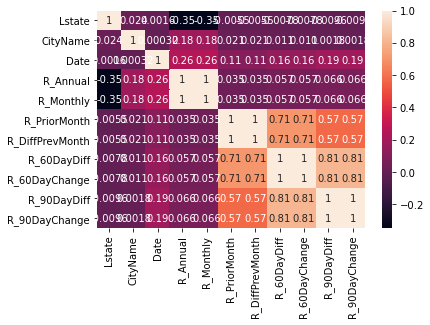

In [193]:
# correlation matrix heatmap 
sns.heatmap(rental.corr(), annot=True)

In [ ]:
###### Decision Tree Classifier ######

In [186]:
# define X and y

feature_cols = ['CityName', 'Date', 'R_Annual', 'R_Monthly','R_PriorMonth',\
                'R_DiffPrevMonth', 'R_60DayDiff', 'R_60DayChange', 'R_90DayDiff', 'R_90DayChange']

X = rental[feature_cols]

y = rental.Lstate

In [188]:
treeclf = DecisionTreeClassifier(max_depth=30, random_state=1)
cross_val_score(treeclf, X, y, cv=50, scoring='accuracy').mean()

0.9843071034560396